#  Выполнение теоремы Гливенко-Кантелли (в “слабом смысле”: со сходимостью по вероятности к нулю)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 1. Теоретическая и эмпирическая функции распределения

In [78]:
def plot_normal(a, sigma, ax=None):
    # создать оси и фигуру если не переданы
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    # массив точек по x
    x = np.linspace(a - 3 * sigma, a + 3 * sigma, 1000)  
    # массив точек по y
    y = norm.cdf(x, a, sigma)
    # график теоретической ф-ции
    ax.plot(x, y, label='Теоретическая функция распределения')
    ax.set_title('Теоретическая функция распределения')
    ax.set_xlabel('Значение случайной величины')
    ax.set_ylabel('Вероятность')
    ax.grid(True, linestyle='-', alpha=0.9)
    # границы
    ax.set_xlim([a - 4 * sigma, a + 4 * sigma])
    ax.set_ylim([0, 1.1])
    # легенда
    ax.legend()

def plot_emp(n, a, sigma, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    # выборка из нормального распределения из n элементов
    samples = np.random.normal(a, sigma, n) 
    x = np.sort(samples)  # вариационный ряд
    # точки по оси y
    y = np.arange(1, len(samples) + 1) / len(samples)
    # график эмпирической ф-ции
    ax.step(x, y, drawstyle='steps-post', label='Эмпирическая функция распределения')
    ax.set_title('Эмпирическая функция распределения')
    ax.set_xlabel('Значение случайной величины')
    ax.set_ylabel('Вероятность')
    # границы
    ax.set_xlim([a - 4 * sigma, a + 4 * sigma])
    ax.set_ylim([0, 1.1])
    # сетка
    ax.grid(True, linestyle='-', alpha=0.9)
    ax.legend()

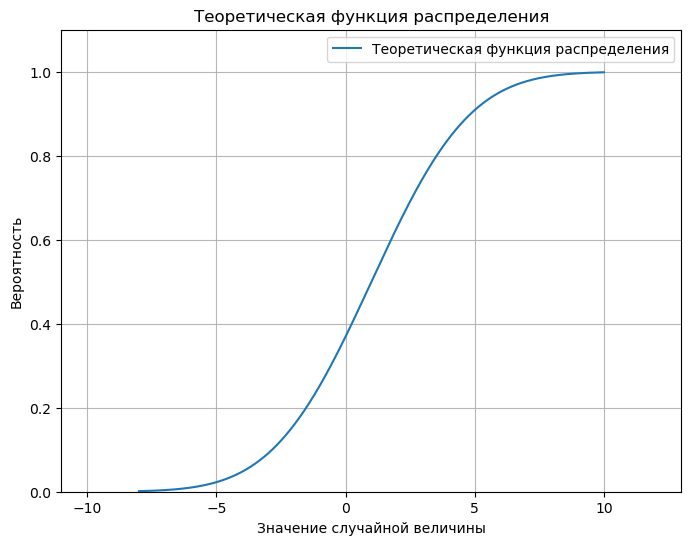

In [79]:
 # берем норм. распределение с мат. ожиданием равным 1 и среднекв. отклонением равным 3
plot_normal(1, 3)

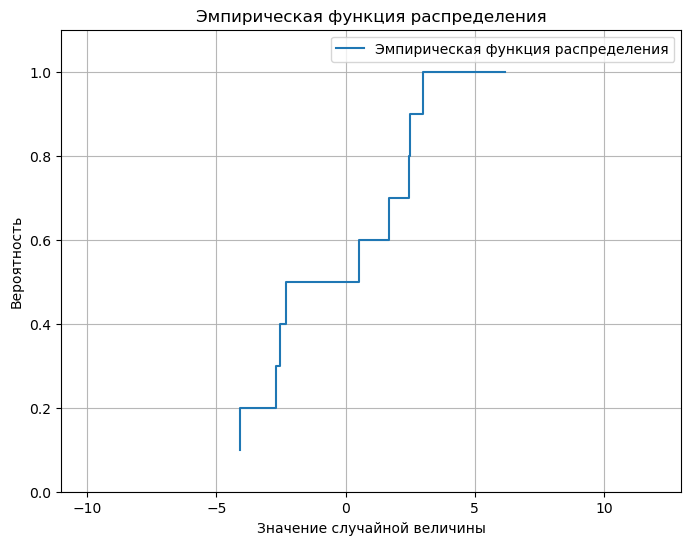

In [80]:
# берем эмпирическую функцию распределения с выборкой из 10 элементов
plot_emp(10, 1, 3)

## 2. Сравнение функций распределения с разными выборками и теоретической

In [76]:
def plot_combined():
    # создаем фигуру и оси
    fig, ax = plt.subplots(figsize=(10, 6))
    # берем норм. распределение с мат. ожиданием равным 1 и среднекв. отклонением равным 3
    plot_normal(1, 3, ax)
    # берем эмпирическую функцию распределения с выборкой из n элементов
    plot_emp(10000, 1, 3, ax)

    plt.show()

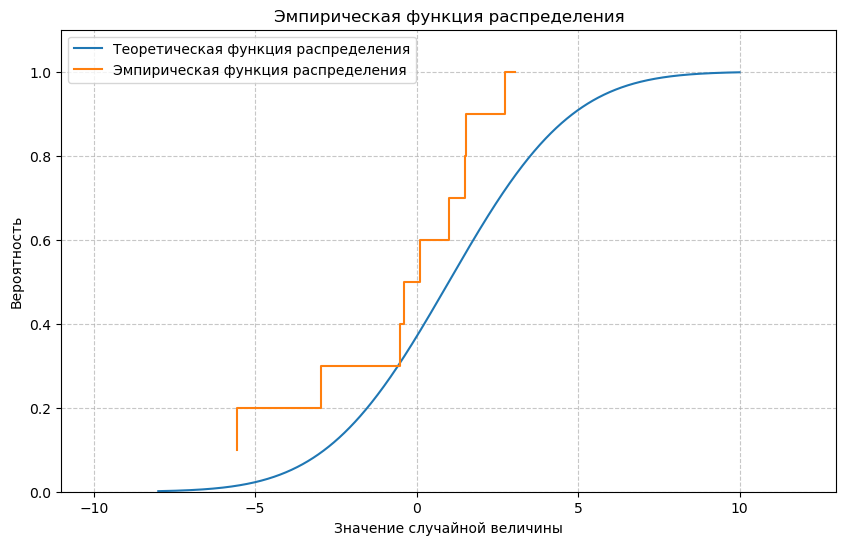

In [55]:
# выборка эмпирической равна 10
plot_combined()

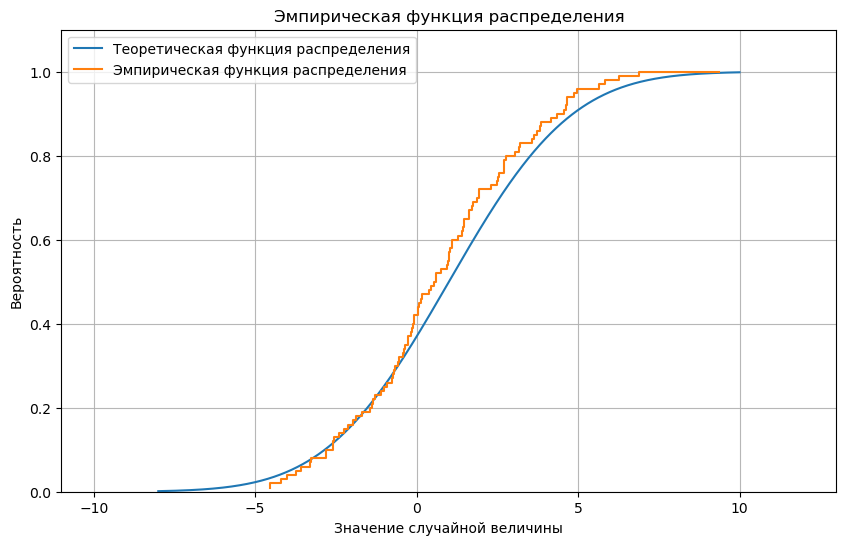

In [73]:
# выборка эмпирической равна 100
plot_combined()

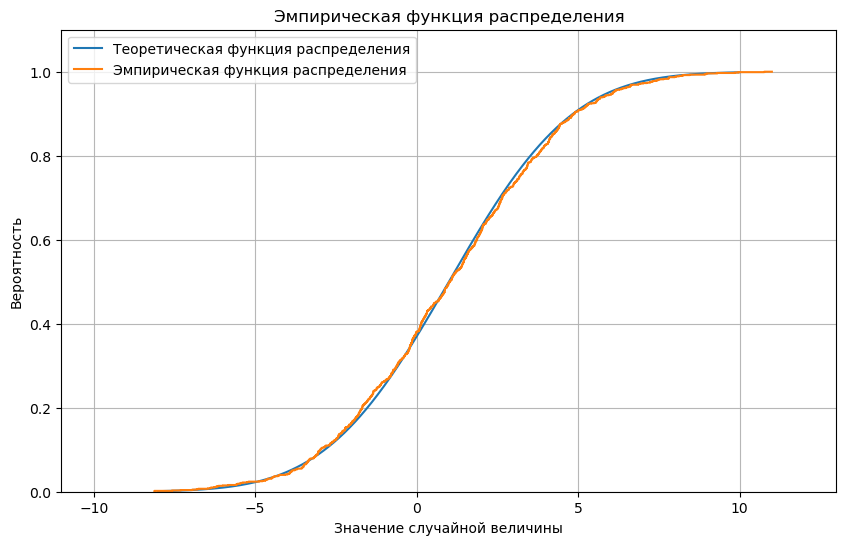

In [75]:
# выборка эмпирической равна 1 000
plot_combined()

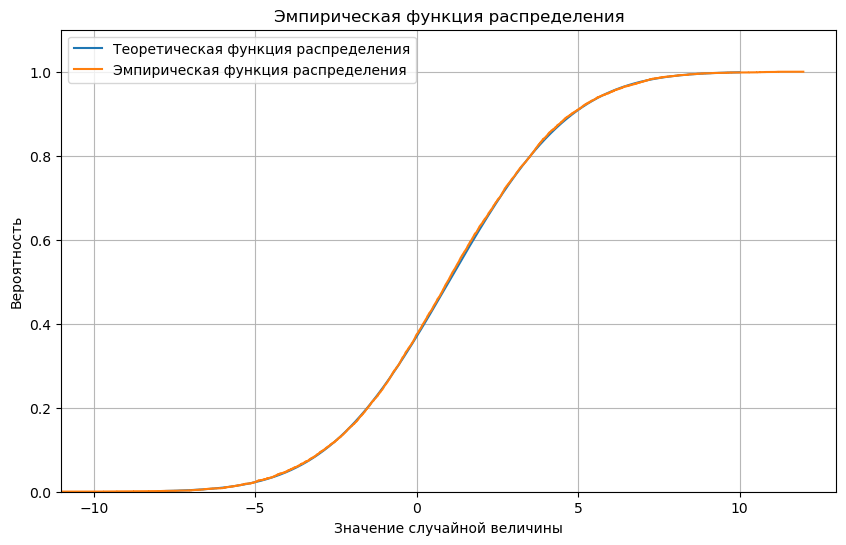

In [77]:
# выборка эмпирической равна 10 000
plot_combined()

### Можно сделать вывод, что действительно при увеличении количества элементов в выборке в эмпирической функции распределения она приближается к теоретической.